## titanic을 같이 한번 만들어 보자! 

In [1]:
import pandas as pd

# 데이터 로딩하기 (train data set loading)
test_df = pd.read_csv("./data/titanic/test.csv")
train_df = pd.read_csv("./data/titanic/train.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 확인

In [2]:
# train_df.shape  # (891, 12)
train_df.info() # 각 column(feature)의 상세정보를 출력
train_df.isnull().sum(axis=0)  # 행방향으로 더해줘야 함

## 결측치와 이상치를 찾아서 적절한 값으로 변경하거나, 삭제해야 함 
# 웬만하면 삭제 X 대체해주는것이 좋음.
# cabin은 데이터가 적어 사용하기 힘들겠지만 
# 나이는 적절하게 바꿔주자. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 그래프 그리는 함수 만들자

In [3]:
def stackedBarChart(feature):
    
    survived = train_df.loc[train_df["Survived"]==1][feature].value_counts() # 각 값이 몇 개씩 있는지 알려줌
    survived.name = "Survived"
    # 사망한 사람의 성별에 따른 사람 수를 구해보자. 
    dead = train_df.loc[train_df["Survived"]==0][feature].value_counts()
    dead.name = "Dead"

    ## 그래프 그리기 위해 두 series 가지고 dataframe 만들자
    chart_df = pd.DataFrame([survived,dead])
    chart_df.plot(kind="bar", stacked=True)  # 누적 막대그래프를 그리겠다.


In [4]:
# 어떤 컬럼(feature)가 생존여부에 영향을 미치는지 확인
# 그래프로 확인해보자! 
# 파이차트나 누적바차트를 많이 이용한다.
# 성별이 생존여부에 영향을 미치는지 확인해보자.
# 생존한 사람의 성별에 따른 사람 수를 구해보자. 
survived = train_df.loc[train_df["Survived"]==1]["Sex"].value_counts() # 각 값이 몇 개씩 있는지 알려줌
survived.name = "Survived"
# 사망한 사람의 성별에 따른 사람 수를 구해보자. 
dead = train_df.loc[train_df["Survived"]==0]["Sex"].value_counts()
dead.name = "Dead"

## 그래프 그리기 위해 두 series 가지고 dataframe 만들자
sex_df = pd.DataFrame([survived,dead])
sex_df
sex_df.plot(kind="bar", stacked=True)  # 누적 막대그래프를 그리겠다.

## 함수 이용해서 그려보자.
stackedBarChart("Sex")
## 결과적으로 성별은 생존여부에 많은 영향을 주고 있음! 


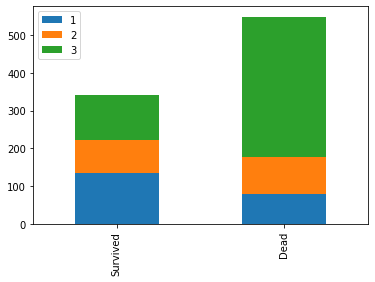

In [5]:
## Pclass가 생존여부에 영향을 미치는지 알아보자
stackedBarChart("Pclass")
## pclass는 영향 많이 주고있다.

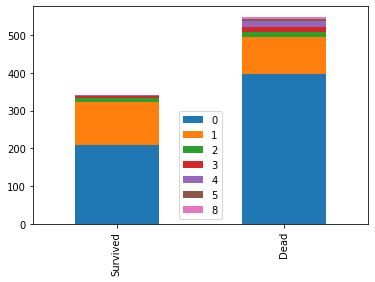

In [6]:
## Sibsp가 생존여부에 영향을 미치는지 알아보자
stackedBarChart("SibSp")

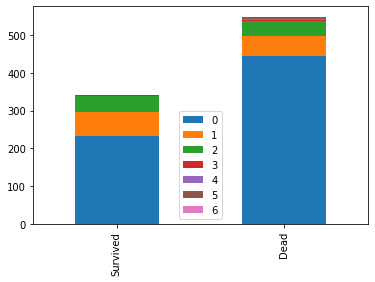

In [7]:
stackedBarChart("Parch")

In [8]:
# SibSp,Parch -> 혼자탄 사람과 아닌 사람으로 합쳐서 분류하는 것이 낫지 않을까?



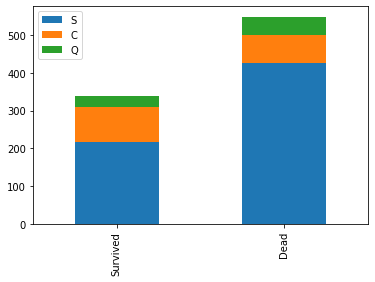

In [9]:
## Embarked : 탑승지역 
stackedBarChart("Embarked")
# S지역은 돈이 적은 사람들
# 다른 지역보다 상대적으로 S에서 많이 타 있는 것을 알 수 있다.
# -> 결측치 2개 S로 바꿔주자

train_df["Embarked"].fillna("S",inplace=True)



In [10]:
#stackedBarChart("Title")



### feature engineering - 학습하기 쉬운 형태로 바꿔주기



In [11]:
# feature: column
train_df.head()
# text로 되어 있는 부분은 machine learning하기가 힘들다! 
# text로 되어 있는 부분은 적절한 scaling의 숫자로 변환
# NaN(결측치)는 삭제하는 것보다는 적절한 값으로 대체하기 

# 제일 먼저 해결해야 하는 feature는 Name
# Name은 그 자체로는 크게 의미가 없어보이지만 이름의 특정 키워드가 드어가 있고 이 키워드가 생존에 영향을 미칠 수 있음.
train_df["Title"]=train_df["Name"].str.extract("([A-Za-z]+)\.")  # +: 1개 이상을 의미  # \.: 점을 의미함.  
  # -> 영문자 나오고 끝에 점찍히는 형태 구해라

train_df["Title"].value_counts()

# Titanic안에 Mr,Miss,Mrs,other을 각각 0,1,2,3으로 변환
title_mapping_dict = {"Mr":0, "Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mlle":3,
                      "Don":3,"Jonkheer":3,"Countess":3,"Lady":3,"Mme":3,"Ms":3,"Sir":3,"Capt":3}
train_df["Title"]=train_df["Title"].map(title_mapping_dict)
train_df.drop("Name",axis=1,inplace=True)  # drop: 행, 열 지울 수 있음 
train_df.drop("Ticket",axis=1,inplace=True)
train_df.drop("Cabin",axis=1,inplace=True)
train_df.drop("PassengerId",axis=1,inplace=True)
train_df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,3
887,1,1,female,19.0,0,0,30.0000,S,1
888,0,3,female,NaN,1,2,23.4500,S,1
889,1,1,male,26.0,0,0,30.0000,C,0


In [12]:
## 성별 column에 대해 male=0, female=1로 변환
sex_mapping_dict = {"male":0,"female":1}
train_df["Sex"]=train_df["Sex"].map(sex_mapping_dict)
train_df

## Embarked (탑승지역) 컬럼에 대해 S = 0, Q =1, C =2로 변환
# -> 그냥 하면 NaN 2개 있기 때문에 결과 실수형으로 나옴.
embarked_mapping_dict = {"S":0,"Q":1,"C":2}
train_df["Embarked"]=train_df["Embarked"].map(embarked_mapping_dict)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,2,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,3
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,NaN,1,2,23.4500,0,1
889,1,1,0,26.0,0,0,30.0000,2,0


In [13]:
## Age에는 결측치가 많음! 
# 결측치를 채워넣어야 함 -> 결측치 많기 때문에 삭제하면 데이터 왜곡됨.
# 전체 사람의 평균을 구해서 결측치를 채운다. -> x 별로 좋은 방법은 아님
# title을 이용해서 각 title에 맞는 평균 나이로 결측치를 채우자 

#title_df = train_df["Age"].groupby([train_df["Title"]])
#title_age_mean = title_df.mean()
#title_age_mean[0] 

age_mean = train_df.groupby("Title")["Age"].mean()
a = train_df[train_df["Title"]==0]["Age"].fillna(age_mean[0])
b = train_df[train_df["Title"]==1]["Age"].fillna(age_mean[1])
c = train_df[train_df["Title"]==2]["Age"].fillna(age_mean[2])
d = train_df[train_df["Title"]==3]["Age"].fillna(age_mean[3])
result_series = pd.concat([a,b,c,d])
train_df["Age"]=result_series.sort_index()
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.000000,1,0,7.2500,0,0
1,1,1,1,38.000000,1,0,71.2833,2,2
2,1,3,1,26.000000,0,0,7.9250,0,1
3,1,1,1,35.000000,1,0,53.1000,0,2
4,0,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,3
887,1,1,1,19.000000,0,0,30.0000,0,1
888,0,3,1,21.773973,1,2,23.4500,0,1
889,1,1,0,26.000000,0,0,30.0000,2,0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,0
1,1,1,1,1.0,1,0,71.2833,2,2
2,1,3,1,1.0,0,0,7.9250,0,1
3,1,1,1,1.0,1,0,53.1000,0,2
4,0,3,0,1.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,13.0000,0,3
887,1,1,1,0.0,0,0,30.0000,0,1
888,0,3,1,1.0,1,2,23.4500,0,1
889,1,1,0,1.0,0,0,30.0000,2,0


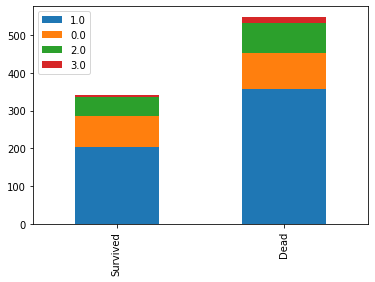

In [14]:
## Age에 대해서 binning 처리 (구간으로 나눠서 숫자 mapping시켜서 숫자 이용하기)
# 고려해야 할 사항 -> 간격 어떻게 설정할거냐?

# Age
# 0~20 : 0
# 20초과~40살 이하 : 1
# 40살 초과~60살 이하 : 2
# 60살 초과 : 3
train_df.loc[train_df["Age"]<=20,"Age"]=0
train_df.loc[(train_df["Age"]>20)&(train_df["Age"]<=40),"Age"]=1
train_df.loc[(train_df["Age"]>40)&(train_df["Age"]<=60),"Age"]=2
train_df.loc[train_df["Age"]>60,"Age"]=3

stackedBarChart("Age")
train_df



14.4542


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0.0,0,0
1,1,1,1,1.0,1,0,2.0,2,2
2,1,3,1,1.0,0,0,0.0,0,1
3,1,1,1,1.0,1,0,1.0,0,2
4,0,3,0,1.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,0.0,0,3
887,1,1,1,0.0,0,0,1.0,0,1
888,0,3,1,1.0,1,2,1.0,0,1
889,1,1,0,1.0,0,0,1.0,2,0


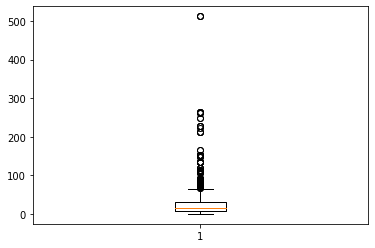

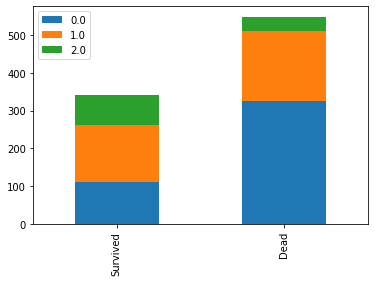

In [15]:
# # Fare도 binning 처리 해보자
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(train_df["Fare"])


q1,q3 = np.percentile(train_df["Fare"],[25,75])
q1 # 7.9104
q3 # 31.0
med = np.percentile(train_df["Fare"],50)
print(med) # 14.4542
iqr = q3-q1
upper = q3+iqr*1.5  # 65.6344

train_df.loc[train_df["Fare"]<=14,"Fare"]=0
train_df.loc[(train_df["Fare"]>14)&(train_df["Fare"]<=65),"Fare"]=1
train_df.loc[(train_df["Fare"]>65),"Fare"]=2


# Fare도 binning 처리 해보자
# train_df.loc[train_df["Fare"]<=100,"Fare"]=0
# train_df.loc[(train_df["Fare"]>100)&(train_df["Fare"]<=200),"Fare"]=1
# train_df.loc[(train_df["Fare"]>200)&(train_df["Fare"]<=300),"Fare"]=2
# train_df.loc[(train_df["Fare"]>300),"Fare"]=3

stackedBarChart("Fare")
train_df


# machine learning으로 들어가자
## logistic regression을 Tensorflow를 이용해서 구현해 보자

- data set을 준비하자
- 정확도를 측정하기 위해 학습용 데이터와 평가용 데이터를 따로 분리해야 한다.
- train_df를 분리해서 학습용 데이터와 평가용 데이터를 생성

- 데이터 한쪽 선택하면 편향이 일어날 수 있으므로 n fold cross validation 이용하자.

### n fold cross validation
- n번 교차검증(보통 n은 10-15)
- 가지고 있는 데이터를 n개로 분리하여 처음에는 1번부분을 평가용으로, 그 다음은 2번부분을 평가용, .. 
- 이렇게 구하고 나서 각각의 정확도의 평균을 구해 정확도로 사용


In [25]:
# 우리는 위 80%를 학습용 데이터로, 아래 20%를 평가용 데이터로 사용
import tensorflow as tf

train_df.shape
train_num = int(train_df.shape[0]*0.8)  # 712개
# test_num = train_df.shape[0]-train_num

# train,test data set
train_x_data = train_df.drop("Survived",axis=1,inplace=False)[:train_num].values  # 컬럼삭제, 원본유지 
test_x_data = train_df.drop("Survived",axis=1,inplace=False)[train_num:].values  

train_y_data = train_df["Survived"][:train_num].values.reshape([-1,1])  # 1차원의 array로 나오므로 2차원의 numpy array로 형태 바꿔줘야 함
test_y_data = train_df["Survived"][train_num:].values.reshape([-1,1])

# tensorflow를 이용한 logistic regression code가 나오면 된다!

# placeholder
#train_x_data.shape
X = tf.placeholder(shape=[None,8],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([8,1]), name="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")

# Hypothesis
logit = tf.matmul(X,W)+b
H = tf.sigmoid(logit)

# cost(loss) function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,labels=Y))

# train - 미분해서 최적의 값 찾아가는 과정 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 학습
for step in range(30000):
    _,cost_val = sess.run([train,cost], feed_dict={X:train_x_data,
                                                  Y:train_y_data})
    if step%3000==0:
        print("cost값은:{}".format(cost_val))

        
        
# -> 우리가 원하는 W와 b를 구해서 모델을 구성

## 정확도 측정
# 테스트용 x 입력데이터(test_x_data)를 넣어서 예측하자
# 이렇게 구한 예측값과 y 입력데이터(test_y_data)를 비교하자
# 예측값과 실제 데이터의 차이를 비교해보자! 

predict = tf.cast(H > 0.5,dtype=tf.float32)
# H가 예측값인데, 0.2가 나오면 1에 가까울 확률이 20%인 것, 0.8이면 1에 가까울 확률이 80%
# 몇을 넘으면 1로 볼것인지는 마음대로 잡아도 되지만, 일반적으로 0.5 많이 한다.
# H>0.5 하면 결과 True, False로 떨어지므로 우리가 가지고 있는 데이터 0,1로 표현해 줘야 한다.
# 실제 데이터와 비교하기 위해 값 바꿔주는 과정 
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean( tf.cast(correct,dtype=tf.float32) )
# correct도 True, False로 떨어짐 -> correct를 실수값으로 다시 바꿔주는 과정

print("정확도:{}".format(sess.run(accuracy,feed_dict={X:test_x_data,
                                                  Y:test_y_data})))



cost값은:0.9166064262390137
cost값은:0.4420807957649231
cost값은:0.43858227133750916
cost값은:0.4377589821815491
cost값은:0.43737009167671204
cost값은:0.4371083378791809
cost값은:0.43690842390060425
cost값은:0.4367503821849823
cost값은:0.4366241693496704
cost값은:0.4365230202674866
정확도:0.8379888534545898


# keggle에 제출해 보자!
- keggle에서 제공한 test.csv파일이 있다.
- test.csv를 이용해서 prediction을 해야 한다.
- 예측결과가 나온다 -> 파일로 만들어서 제출



- test.csv를 살펴보면 train.csv와 같음!
- test.csv도 accuaracy를 구할 수 있는 형태로 feature engineering해야 함! 



In [17]:
## 80%,20% 나누지 말고 100% 다 학습시키자

# 우리는 위 80%를 학습용 데이터로, 아래 20%를 평가용 데이터로 사용
import tensorflow as tf

# train,test data set
x_data = train_df.drop("Survived",axis=1,inplace=False).values  # 컬럼삭제, 원본유지 
y_data = train_df["Survived"].values.reshape([-1,1])  # 1차원의 array로 나오므로 2차원의 numpy array로 형태 바꿔줘야 함

# tensorflow를 이용한 logistic regression code가 나오면 된다!

# placeholder
#train_x_data.shape
X = tf.placeholder(shape=[None,8],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([8,1]), name="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")

# Hypothesis
logit = tf.matmul(X,W)+b
H = tf.sigmoid(logit)

# cost(loss) function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,labels=Y))

# train - 미분해서 최적의 값 찾아가는 과정 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 학습
for step in range(30000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                  Y:y_data})
    if step%3000==0:
        print("cost값은:{}".format(cost_val))
        
        

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ten

cost값은:0.9487931728363037
cost값은:0.4355190396308899
cost값은:0.42647916078567505
cost값은:0.4247971773147583
cost값은:0.42434319853782654
cost값은:0.424172043800354
cost값은:0.42407989501953125
cost값은:0.4240167737007141
cost값은:0.4239692986011505
cost값은:0.4239318370819092


In [18]:
import matplotlib.pyplot as plt
import numpy as np

test_df
#test_df.info() # 각 column(feature)의 상세정보를 출력
test_df.isnull().sum(axis=0) 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
# fare_mean = test_df.groupby("Pclass")["Fare"].mean()
# a = test_df[test_df["Pclass"]==1]["Fare"].fillna(fare_mean[1])
# b = test_df[test_df["Pclass"]==2]["Fare"].fillna(fare_mean[2])
# c = test_df[test_df["Pclass"]==3]["Fare"].fillna(fare_mean[3])
# result_series = pd.concat([a,b,c])
# test_df["Fare"]=result_series.sort_index()

# plt.boxplot(test_df["Fare"])


# q1,q3 = np.percentile(test_df["Fare"],[25,75])
# med = np.percentile(test_df["Fare"],50)
# print(med) # 14.4542
# iqr = q3-q1
# upper = q3+iqr*1.5  # 65.6344
# print(upper)




In [20]:
test_df["Title"]=test_df["Name"].str.extract("([A-Za-z]+)\.")
# Titanic안에 Mr,Miss,Mrs,other을 각각 0,1,2,3으로 변환
title_mapping_dict = {"Mr":0, "Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mlle":3,
                      "Don":3,"Jonkheer":3,"Countess":3,"Lady":3,"Mme":3,"Ms":3,"Sir":3,"Capt":3}
test_df["Title"]=test_df["Title"].map(title_mapping_dict)
test_df["Title"].fillna(3,inplace=True)
test_df.drop("Name",axis=1,inplace=True)  # drop: 행, 열 지울 수 있음 
test_df.drop("Ticket",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("PassengerId",axis=1,inplace=True)


## 성별 column에 대해 male=0, female=1로 변환
sex_mapping_dict = {"male":0,"female":1}
test_df["Sex"]=test_df["Sex"].map(sex_mapping_dict)


## Embarked (탑승지역) 컬럼에 대해 S = 0, Q =1, C =2로 변환
# -> 그냥 하면 NaN 2개 있기 때문에 결과 실수형으로 나옴.
embarked_mapping_dict = {"S":0,"Q":1,"C":2}
test_df["Embarked"]=test_df["Embarked"].map(embarked_mapping_dict)


## 결측치 채우기 - age, fare
fare_mean = train_df.groupby("Pclass")["Fare"].mean()
fare_mean
#plt.boxplot(test_df["Fare"].dropna(how="any",inplace=False))
#test_df["Fare"].fillna(fare_mean)

fare_mean = test_df.groupby("Pclass")["Fare"].mean()
a = test_df[test_df["Pclass"]==1]["Fare"].fillna(fare_mean[1])
b = test_df[test_df["Pclass"]==2]["Fare"].fillna(fare_mean[2])
c = test_df[test_df["Pclass"]==3]["Fare"].fillna(fare_mean[3])
result_series = pd.concat([a,b,c])
test_df["Fare"]=result_series.sort_index()

age_mean = test_df.groupby("Title")["Age"].mean()
a = test_df[test_df["Title"]==0]["Age"].fillna(age_mean[0])
b = test_df[test_df["Title"]==1]["Age"].fillna(age_mean[1])
c = test_df[test_df["Title"]==2]["Age"].fillna(age_mean[2])
d = test_df[test_df["Title"]==3]["Age"].fillna(age_mean[3])
result_series = pd.concat([a,b,c,d])
test_df["Age"]=result_series.sort_index()
test_df


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.50000,0,0,7.8292,1,0.0
1,3,1,47.00000,1,0,7.0000,0,2.0
2,2,0,62.00000,0,0,9.6875,1,0.0
3,3,0,27.00000,0,0,8.6625,0,0.0
4,3,1,22.00000,1,1,12.2875,0,2.0
...,...,...,...,...,...,...,...,...
413,3,0,32.00000,0,0,8.0500,0,0.0
414,1,1,39.00000,0,0,108.9000,2,3.0
415,3,0,38.50000,0,0,7.2500,0,0.0
416,3,0,32.00000,0,0,8.0500,0,0.0


In [21]:
## Age에 대해서 binning 처리 (구간으로 나눠서 숫자 mapping시켜서 숫자 이용하기)
# 고려해야 할 사항 -> 간격 어떻게 설정할거냐?

# Age
# 0~20 : 0
# 20초과~40살 이하 : 1
# 40살 초과~60살 이하 : 2
# 60살 초과 : 3
test_df.loc[test_df["Age"]<=20,"Age"]=0
test_df.loc[(test_df["Age"]>20)&(test_df["Age"]<=40),"Age"]=1
test_df.loc[(test_df["Age"]>40)&(test_df["Age"]<=60),"Age"]=2
test_df.loc[test_df["Age"]>60,"Age"]=3

# Fare도 binning 처리 해보자
test_df.loc[train_df["Fare"]<=100,"Fare"]=0
test_df.loc[(test_df["Fare"]>100)&(test_df["Fare"]<=200),"Fare"]=1
test_df.loc[(test_df["Fare"]>200)&(test_df["Fare"]<=300),"Fare"]=2
test_df.loc[(test_df["Fare"]>300),"Fare"]=3

# test_df.loc[test_df["Fare"]<=14,"Fare"]=0
# test_df.loc[(test_df["Fare"]>14)&(test_df["Fare"]<=67),"Fare"]=1
# test_df.loc[(test_df["Fare"]>67),"Fare"]=2



In [22]:
x_data = test_df.values  # 컬럼삭제, 원본유지 

result_H = sess.run(H, feed_dict={X:x_data})      

predict = tf.cast(result_H > 0.5,dtype=tf.int32)
result = sess.run(predict)

test_id = pd.read_csv("./data/titanic/test.csv")["PassengerId"]


# concat(): 연결 -> 연결할 것을 list 형태로
s1 = pd.DataFrame(test_id)
s2 = pd.DataFrame(result)
result = pd.concat([s1,s2],axis=1)
#result = result.rename({'Survived':'0'},axis='columns')
result.columns=['PassengerId','Survived']
result



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [23]:
result.to_csv('./data/titanic/gender_submission3.csv',
                 sep=',',
                 na_rep='NaN', 
                 columns = ['PassengerId','Survived'], # columns to write
                 index = False) # do not write index




## Sklearn으로 해보자

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
myModel = model.fit(train_x_data,train_y_data)  # 학습 끝
result = myModel.predict(test_x_data)


C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0], dtype=int64)